In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
si = SimpleImputer()
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('/content/Breast Cancer Data Set (1).csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop('id', axis=1, inplace=True)

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [34]:
df.nunique().sort_values()

Unnamed: 32                  0
diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
area_mean                  539
concavity_worst            539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
dtype: i

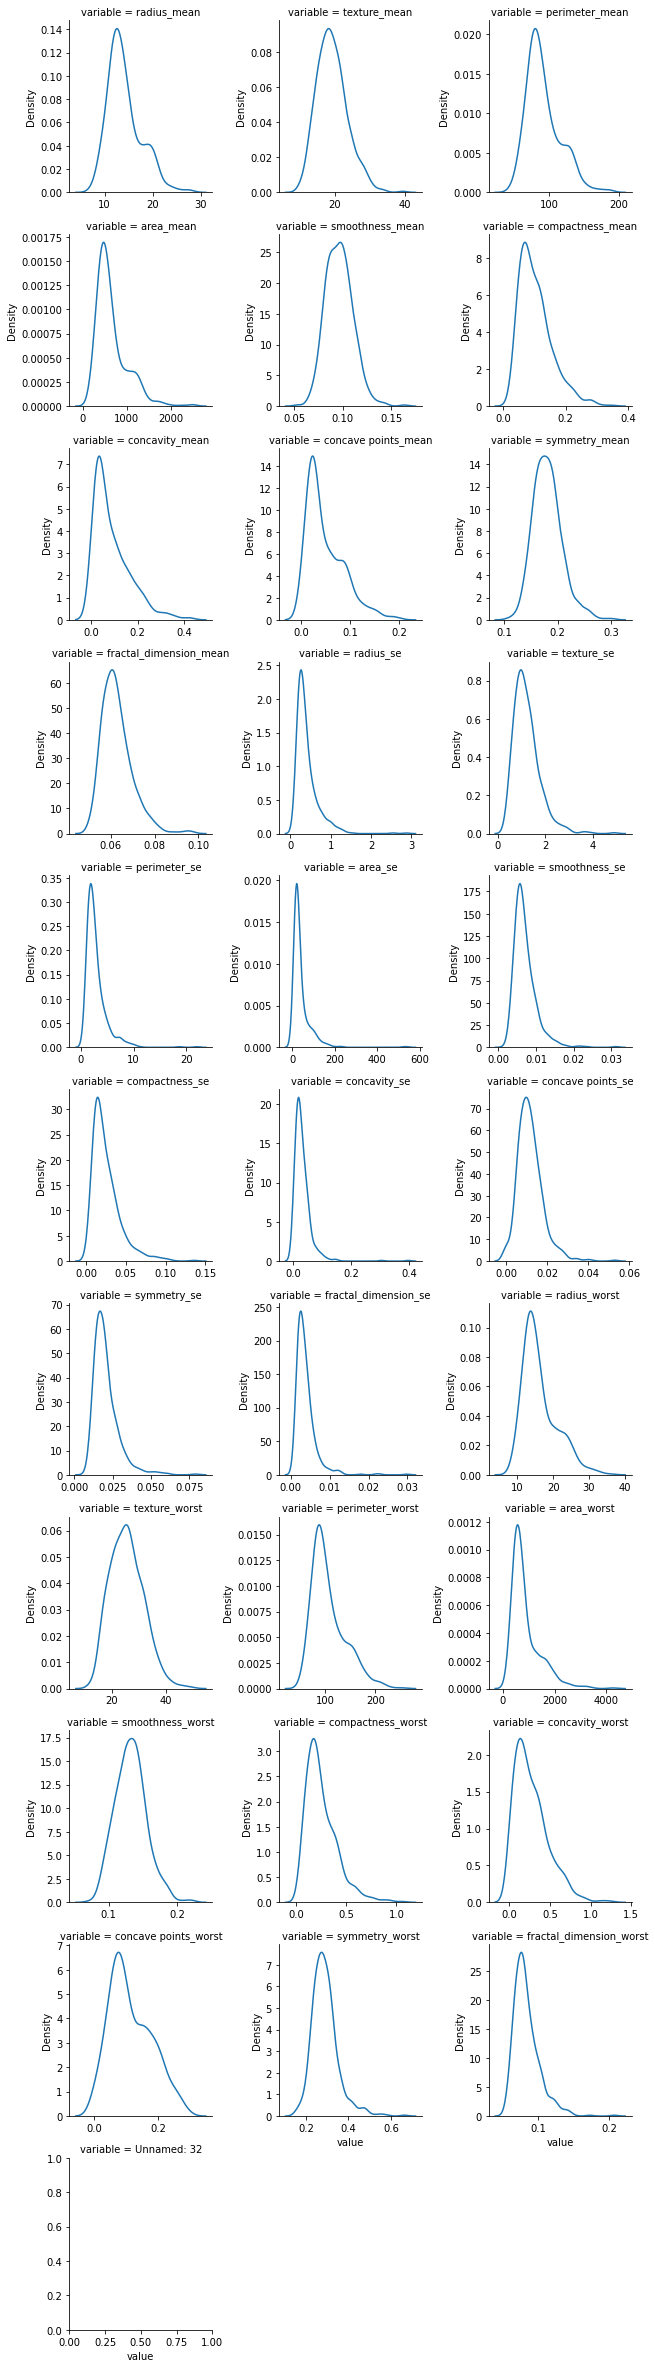

In [36]:

unpivot = pd.melt(df, df.describe().columns[0], df.describe().columns[1:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

In [7]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

In [8]:
corr = df.corr()

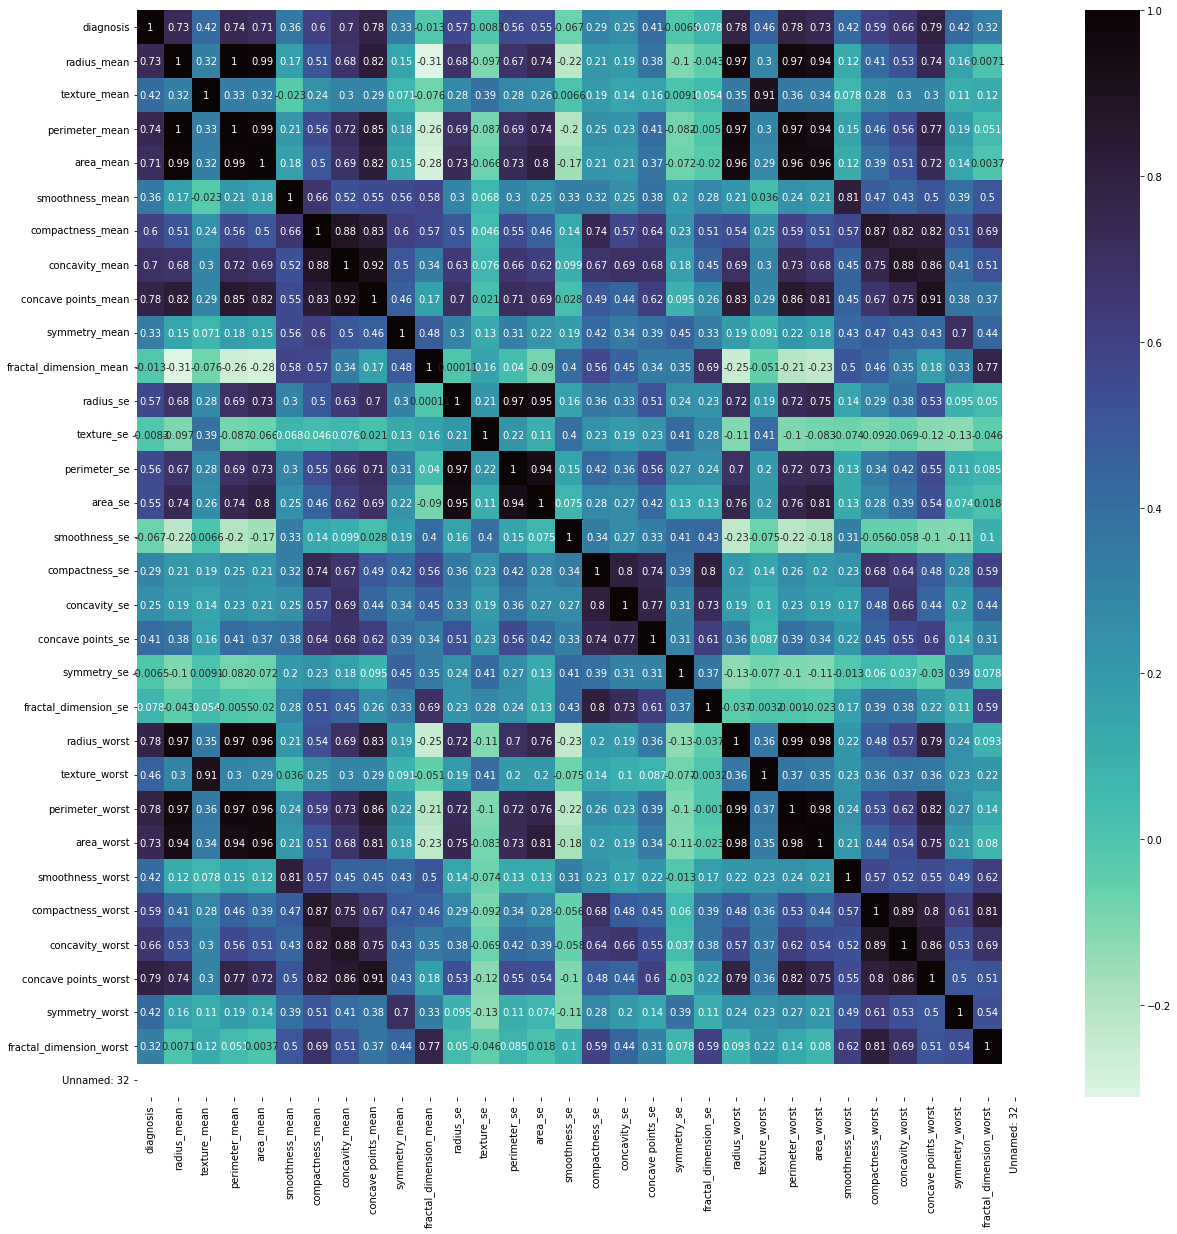

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [10]:
cor_target = abs(corr["diagnosis"])

relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.iteritems()]

names.remove('diagnosis')

print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
x = df[names].values
y = df['diagnosis']

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [15]:
print(xtrain.shape)
print(ytrain.shape)

(398, 25)
(398,)


In [16]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [19]:
ann = Sequential()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=15,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss="binary_crossentropy")

In [25]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [26]:
ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/300
13/13 [==============================] - 2s 16ms/step - loss: 0.6908 - val_loss: 0.6838
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6788 - val_loss: 0.6662
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6481 - val_loss: 0.6239
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6018 - val_loss: 0.5766
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5530 - val_loss: 0.5301
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5079 - val_loss: 0.4890
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4680 - val_loss: 0.4540
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4318 - val_loss: 0.4223
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3972 - val_loss: 0.3946
Epoch 10/300
13/13 [==============================] - 0s 6ms/step - loss: 0.3657 - val_loss: 0.3699
Epoch 11

In [28]:
def mymodel(model):             
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"training accuracy is {train}\nTesting accuracy is:{test}")
    print (classification_report(ytest,ypred))

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report

In [30]:
sv = mymodel(SVC())

training accuracy is 0.9899497487437185
Testing accuracy is:0.9590643274853801
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [31]:
lg = mymodel(LogisticRegression())

training accuracy is 0.9899497487437185
Testing accuracy is:0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [32]:
xg = mymodel(XGBClassifier())

training accuracy is 1.0
Testing accuracy is:0.9590643274853801
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

